## Clusterización de los barrios de BCN:

In [1]:
# Librerías básicas
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings

# Supresión de las advertencias una vez depurado el código:
warnings.filterwarnings("ignore")

In [3]:
# Cargar los datos del csv en un DataFrame:
df = pd.read_csv('../04-Dataset Finales/dataset_BCN.csv', sep=';')

# Converisón de las variables a numéricas:
df['Anno'] = df['Anno'].str.replace(',', '.').astype(float).astype(int)
df['Defunciones'] = df['Defunciones'].str.replace(',', '.').astype(float).astype(int)
df['Habitantes'] = df['Habitantes'].str.replace(',', '.').astype(float).astype(int)
df['Emigrantes'] = df['Emigrantes'].str.replace(',', '.').astype(float).astype(int)
df['Incidentes'] = df['Incidentes'].str.replace(',', '.').astype(float).astype(int)
df['Inmigrantes'] = df['Inmigrantes'].str.replace(',', '.').astype(float).astype(int)
df['Nacimientos'] = df['Nacimientos'].str.replace(',', '.').astype(float).astype(int)
df['Renta'] = df['Renta'].str.replace(',', '.').astype(float).astype(int)
df['valor_catastral'] = df['valor_catastral'].str.replace(',', '.').astype(float).astype(int)

# Filtrado del año para coger los que contienen información de las variables a estudiar:
df_filtrado =  df[(df['Anno']>=2018) & (df['Anno']<=2021)]

# Se eliminan la columnas que no son de interes y se sumarizan las filas para generar una única fila por barrio-kpis:
df_filtrado = df_filtrado.drop(columns=['Superfície (ha)','Densitat (hab/ha)','Indice_Gini','Personas_en_domicilio','Domicilios', 'Desc_valor_catastral'])
# Para cada barrio se hace la media de las condiciones de vida entre los años 2018 y 2021:
df_filtrado = df_filtrado.groupby(['Cod_Barrio','Nom_Barrio', 'Cod_Distrito','Nom_Distrito']).mean().reset_index()
df_filtrado = df_filtrado.drop_duplicates()

# Selección de variables relevantes para la generación de los clusters:
variables = ['Defunciones', 'Nacimientos', 'Habitantes', 'Emigrantes', 'Inmigrantes', 'Renta', 'valor_catastral', 'Incidentes']

# Estandarización de las variables:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_filtrado[variables])




In [4]:
# Se va a aplicar el método del codo para encontrar el número óptimo de clusters:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

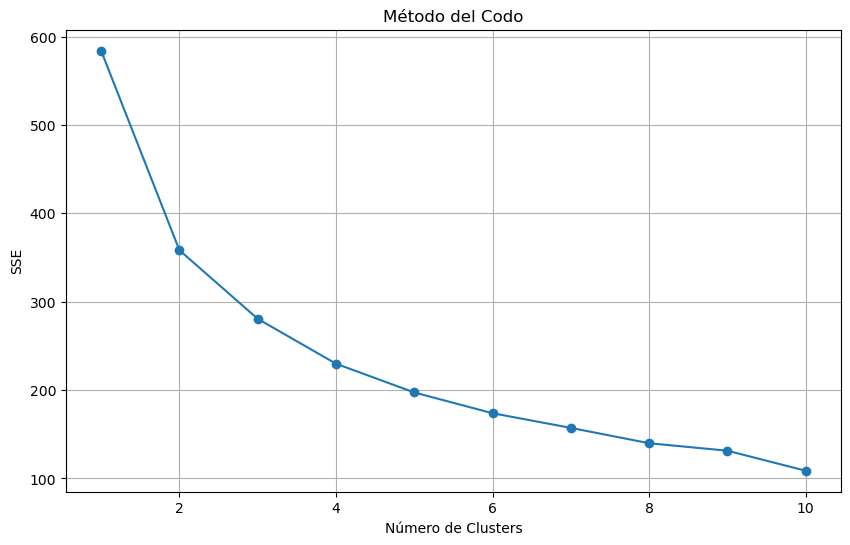

In [5]:
# Gráfica del método del codo:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('SSE')
plt.title('Método del Codo')
plt.grid()
plt.show()

Se puede observar que el número óptimo sería 3 o 4 clusters.

Se va a definir el k-means con 3 en primer lugar dado que es donde parece que deja de decrecer de forma abrupta.

         Defunciones   Habitantes  Emigrantes  Incidentes  Inmigrantes  \
cluster                                                                  
0           2.127315  2260.910880   45.038194  770.736111   143.722222   
1           0.804938   831.929509    9.933333  172.237426    24.385091   
2           1.523438  1657.342882   15.557292  296.334201    39.328993   

         Nacimientos        Renta  valor_catastral  
cluster                                             
0           7.056713  1160.518519        58.668981  
1           2.710709   932.702711        38.152603  
2           7.263889  1612.663194        64.223090  


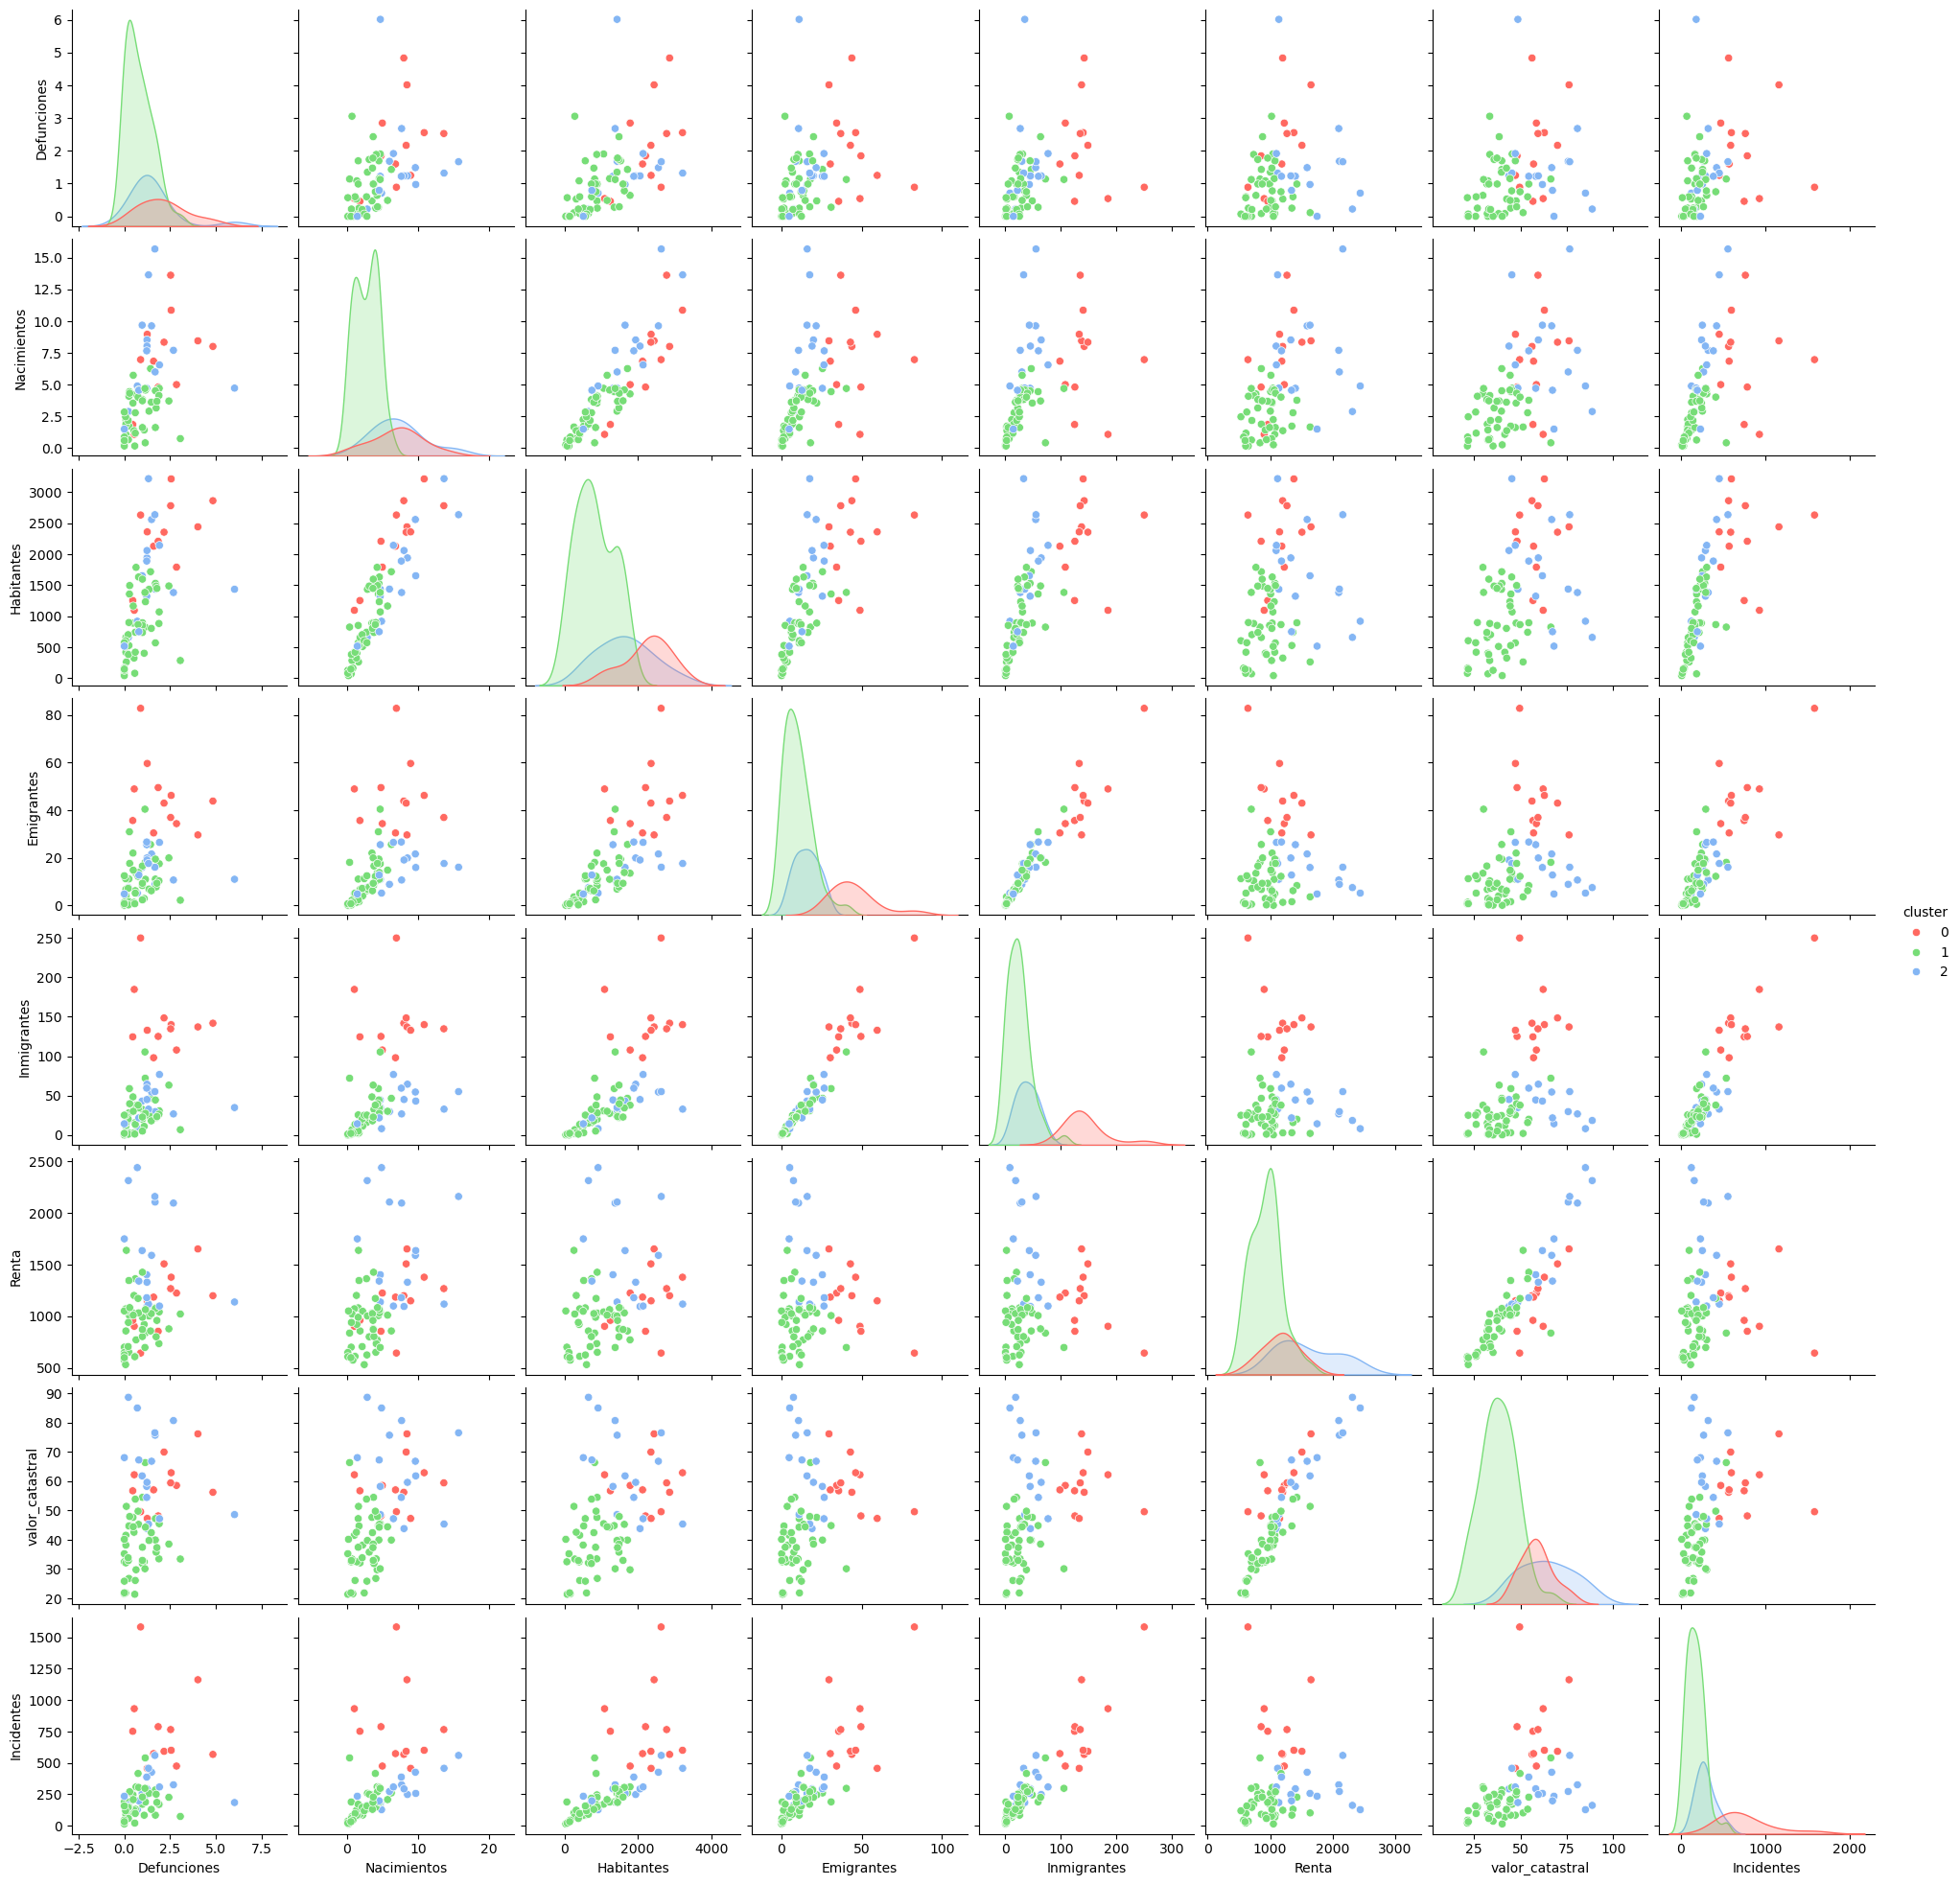

In [12]:
# En base a la conclusión del método del codo se definen 3 clusters:
k = 3
kmeans = KMeans(n_clusters=k, random_state=0)
df_filtrado_3 = df_filtrado
df_filtrado_3['cluster'] = kmeans.fit_predict(df_scaled)

# Se añade la columna con el cluster a los datos:
df_filtrado_3['cluster'] = kmeans.labels_

# Se genera un dataframe con las variables de interes y el cluster para su análisis:
df_filtrado_3_num = df_filtrado_3.drop(columns= ['Nom_Barrio', 'Nom_Distrito','Anno','Cod_Barrio', 'Cod_Distrito'])

# Análiis de los clusters:
print(df_filtrado_3_num.groupby('cluster',).mean())

# Definición de los colores para cada cluster:
colores = {0: '#FF6961', 1: '#77DD77', 2: '#84B6F4'}

# Visualización de los clusters:
sns.pairplot(df_filtrado_3, hue='cluster', vars=variables, palette=colores)
plt.show()

# Exportación de la clusterización:
df_filtrado_3.to_csv('../04-Dataset Finales/knn_3.csv', encoding='UTF-8', index=False, sep=';', decimal=',')


Se va a definir ahora con 4 para ver las diferencias.

         Defunciones   Habitantes  Emigrantes  Incidentes  Inmigrantes  \
cluster                                                                  
0           0.517222   450.713116    4.762222  100.555145    11.237609   
1           1.366071  1461.689980   17.378968  271.810020    42.709325   
2           2.127315  2260.910880   45.038194  770.736111   143.722222   
3           1.177083  1469.895833   11.281250  295.934028    31.223958   

         Nacimientos        Renta  valor_catastral  
cluster                                             
0           1.645386   904.632657        34.761353  
1           4.970734  1037.837302        45.437004  
2           7.056713  1160.518519        58.668981  
3           7.236111  2012.371528        75.395833  


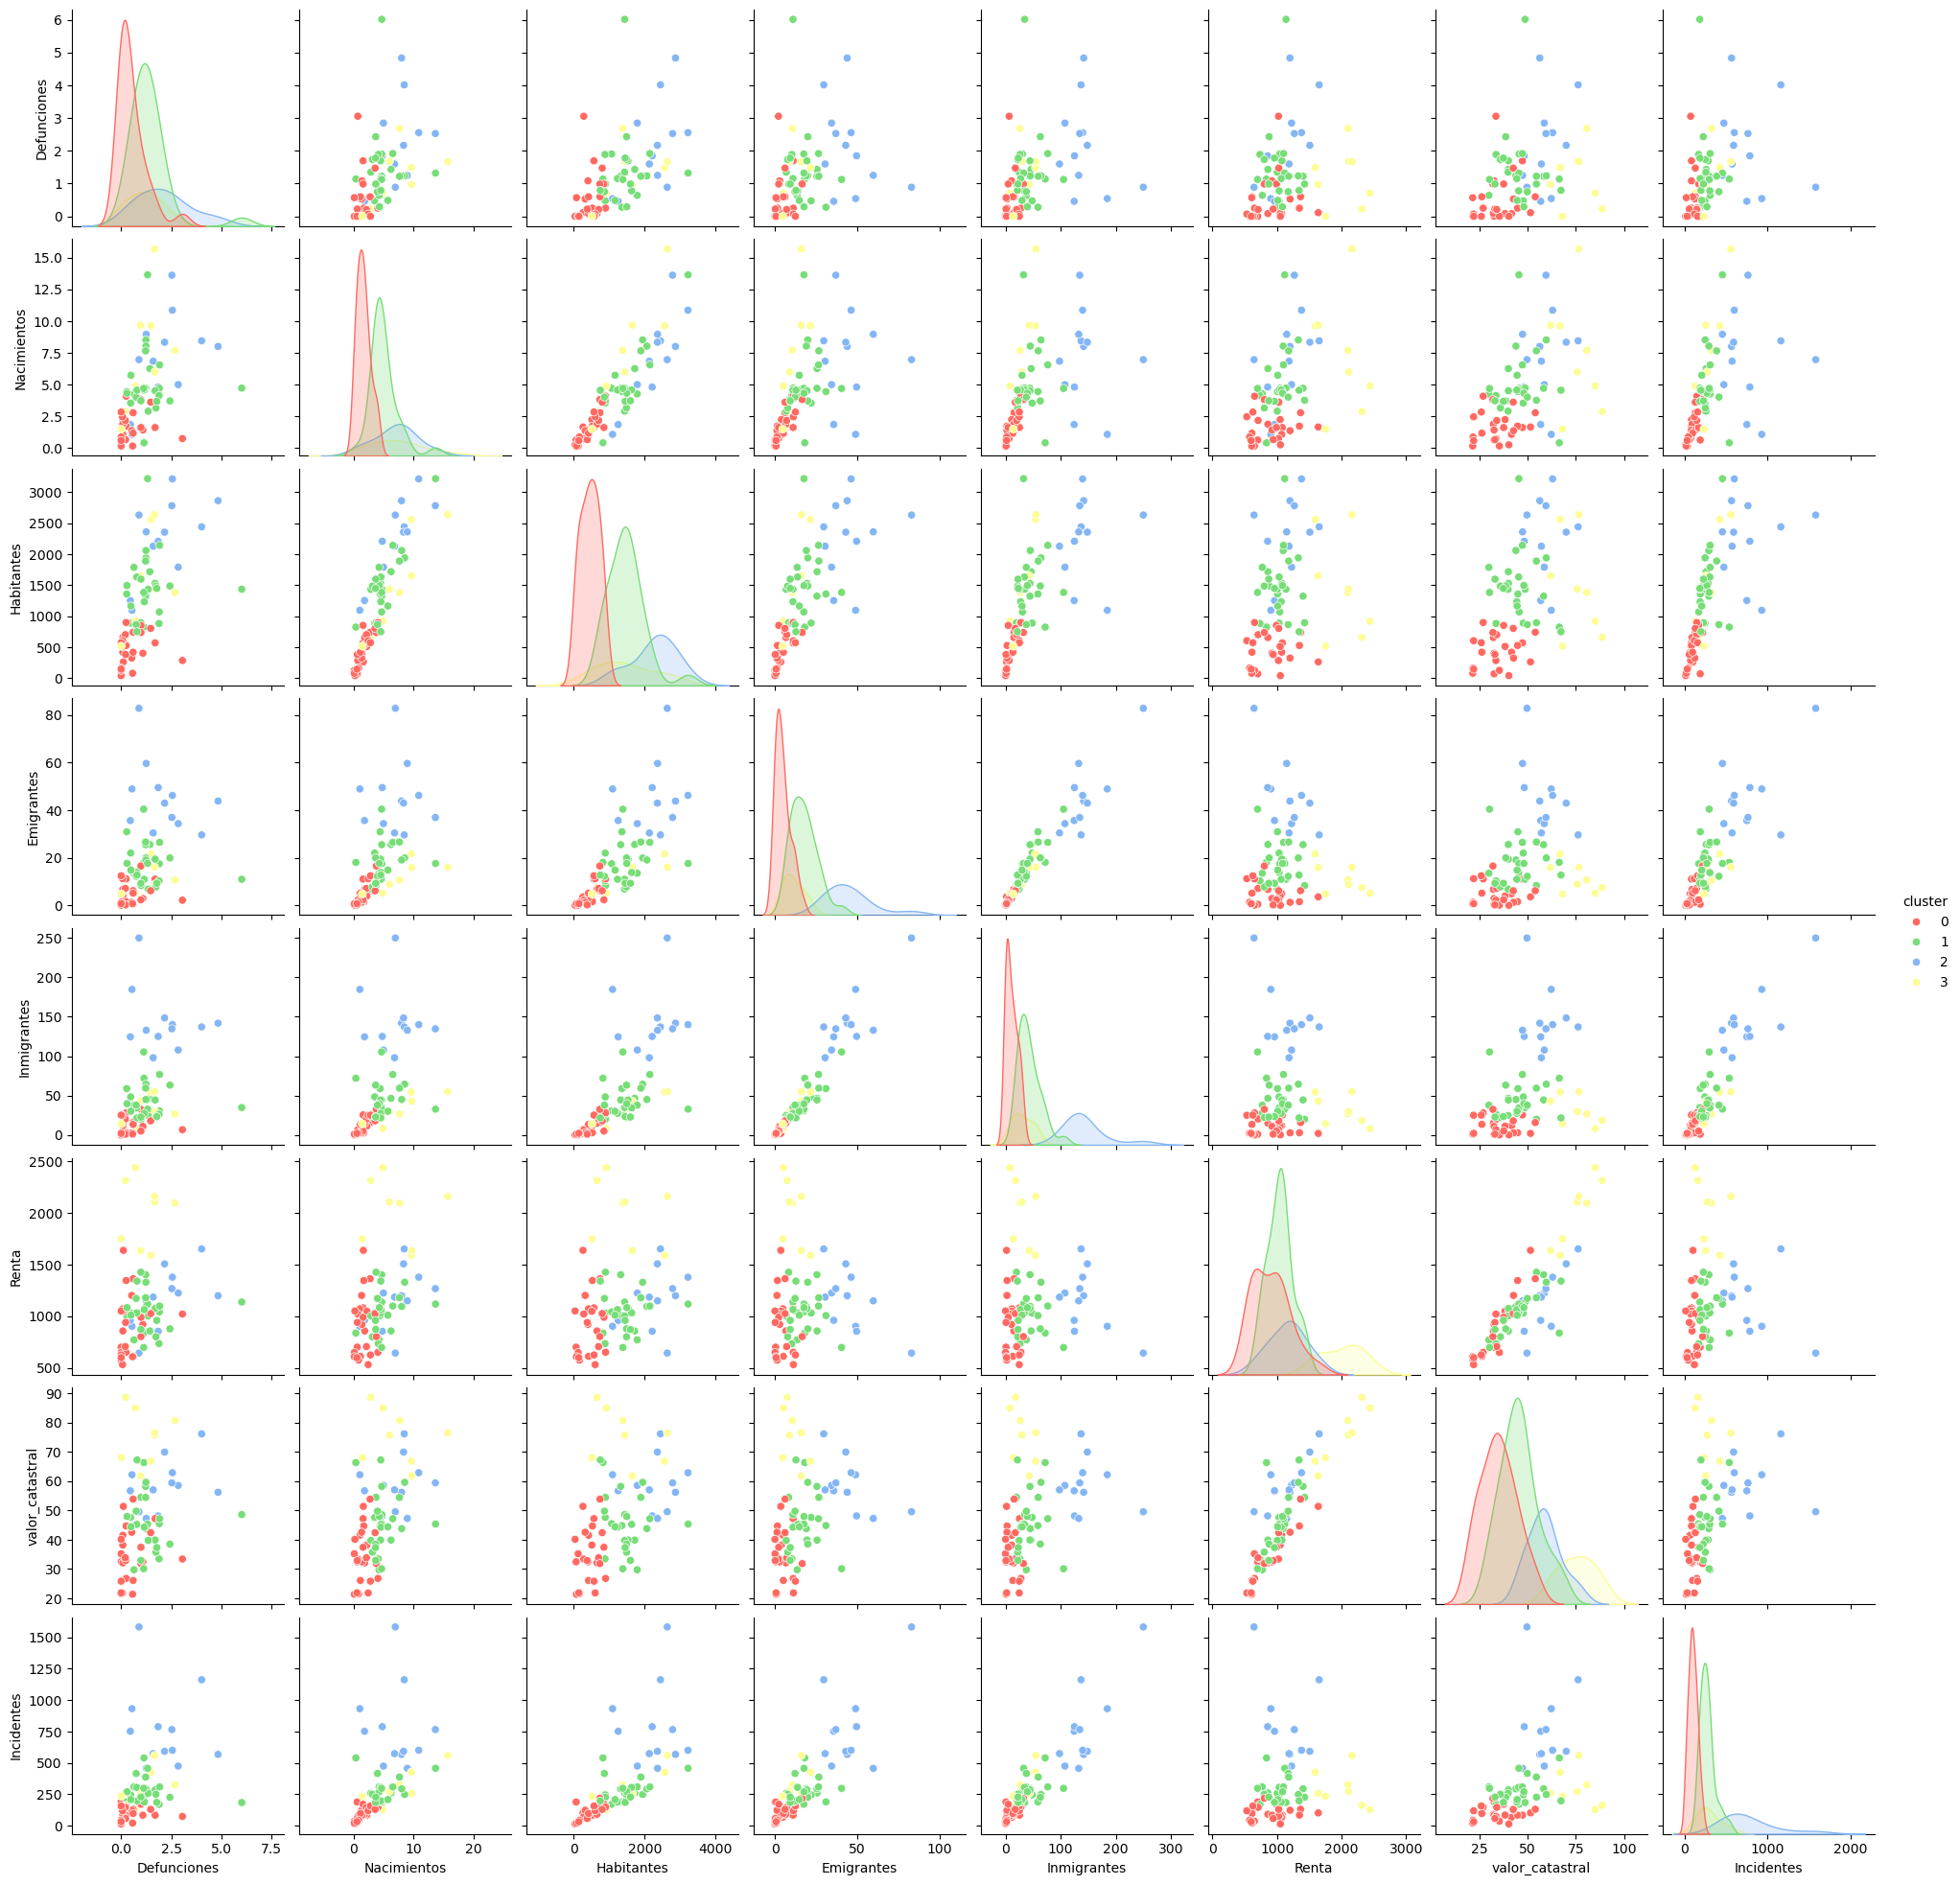

In [10]:
# En base a la conclusión del método del codo se definen 4 clusters:
k = 4
kmeans = KMeans(n_clusters=k, random_state=0)
df_filtrado_4 = df_filtrado
df_filtrado_4['cluster'] = kmeans.fit_predict(df_scaled)

# Se añade la columna con el cluster a los datos:
df_filtrado_4['cluster'] = kmeans.labels_

# Se genera un dataframe con las variables de interes y el cluster para su análisis:
df_filtrado_4_num = df_filtrado_4.drop(columns= ['Nom_Barrio', 'Nom_Distrito','Anno','Cod_Barrio', 'Cod_Distrito'])

# Análiis de los clusters:
print(df_filtrado_4_num.groupby('cluster',).mean())

# Definición de los colores para cada cluster:
colores = {0: '#FF6961', 1: '#77DD77', 2: '#84B6F4', 3:'#FDFD96'}

# Visualización de los clusters:
sns.pairplot(df_filtrado_4, hue='cluster', vars=variables, palette=colores)
plt.show()

# Exportación de la clusterización:
df_filtrado_4.to_csv('../04-Dataset Finales/knn_4.csv', encoding='UTF-8', index=False, sep=';', decimal=',')